# Undersampling simulation for parallel imaging

Created on 2023/8/19 by S.Funayama

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import skimage

In [4]:
def ifft(x, axes=None):
    if axes is None:
        axes = np.arange(x.ndim)

    return np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(x, axes=axes),
                                        axes=axes,
                                        norm='ortho'),
                           axes=axes)


def fft(x, axes=None):
    if axes is None:
        axes = np.arange(x.ndim)

    return np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(x, axes=axes),
                                       axes=axes,
                                       norm='ortho'),
                           axes=axes)

# Generate numerical phantom

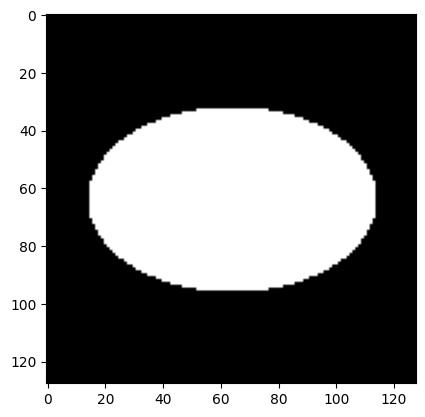

In [10]:
nx, ny = (128, 128)  # These should be even.
cx, cy = (64, 64)
rx, ry = (32, 50)

img = np.zeros([nx, ny])

rr, cc = skimage.draw.ellipse(cx, cy, rx, ry, shape=[nx, ny])
img[rr, cc] = 1

plt.imshow(img, cmap='gray')

# Prepare sampling mask

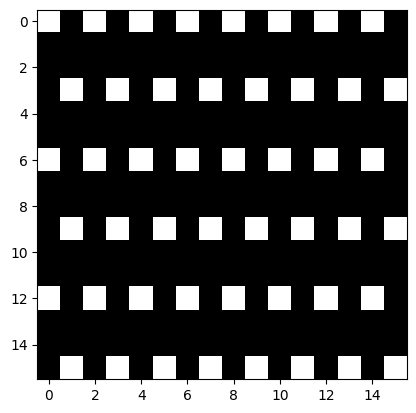

In [11]:
accel_x, accel_y = (3, 2)

yshift = 1
xshift = 2

zoom_size = (16, 16)

mask = np.zeros_like(img)

mask[::accel_x,::accel_y] = 1
mask[accel_x::xshift * accel_x,:] = np.roll(mask[accel_x::xshift * accel_x,:], (0, yshift))

plt.imshow(mask[:zoom_size[0], :zoom_size[1]], cmap='gray')

mask = np.fft.fftshift(mask)

# Apply undersampling

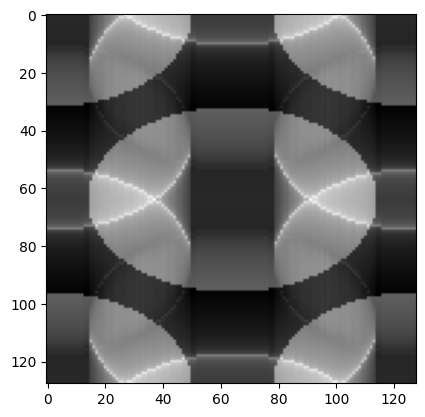

In [12]:
k_space = fft(img)
k_space_undersampled = k_space * mask
img_undersampled = ifft(k_space_undersampled)

img_undersampled = np.abs(img_undersampled)

plt.imshow(img_undersampled, cmap='gray')

# Playground cell

In [15]:
def apply_and_plot(img, rx, ry, ryshift, yx_shift=2, zoom_size=(16, 16)):
    # Prepare undersampling mask
    mask = np.zeros_like(img)

    mask[::rx,::ry] = 1
    mask[rx::rx_shift * rx,:] = np.roll(mask[rx::rx_shift * rx,:], (0, ryshift))

    # misc.show_img(mask[:zoom_size[0], :zoom_size[1]], zoom=1.5)

    mask = np.fft.fftshift(mask)


    # Apply undersampling
    k_space = fft(img)
    k_space_undersampled = k_space * mask
    img_undersampled = ifft(k_space_undersampled)

    img_undersampled = np.abs(img_undersampled)


    # Plot results
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(img, cmap='gray')

    ax2 = fig.add_subplot(1, 3, 2)
    tmp = np.fft.ifftshift(mask)[:zoom_size[0], :zoom_size[1]]
    ax2.imshow(tmp, cmap='gray')

    # bottom
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.imshow(img_undersampled, cmap='gray')

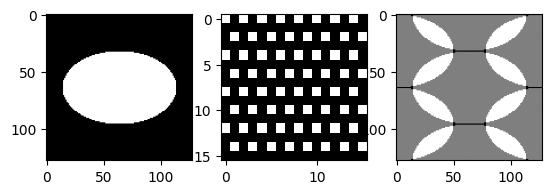

In [23]:
accel_x, accel_y = (2, 2)

yshift = 1

apply_and_plot(img, accel_x, accel_y, yshift)